In [2]:
import numpy as np #linear algebra
import pandas as pd #data manipulation and analysis
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)
import warnings # ignore warnings
warnings.filterwarnings('ignore')

path = "../data/cleanData/fullData.csv"

# # Permanently changes the pandas settings
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv(path)
df = df.rename(columns = {'Unnamed: 0':'County Name'})
df=df.fillna(0)
df

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,"Adams County, Ohio",27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0.0
1,"Allen County, Ohio",101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,1.0
2,"Ashland County, Ohio",52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0.0
3,"Ashtabula County, Ohio",97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0.0
4,"Athens County, Ohio",62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,"Wood County, Ohio",132472,6623.60,26891.82,21327.99,66765.89,122801.54,3841.69,397.42,2649.44,...,20.7,66337,36047,14439.45,2701,57707,2719738,214.3,617.16,0.0
84,"Union County, Ohio",64971,3963.23,15852.92,8446.23,33460.06,58214.02,1754.22,129.94,3703.35,...,25.9,96634,44442,3573.40,1083,25265,1591247,145.4,431.76,1.0
85,"Wyandot County, Ohio",21708,1128.82,4840.88,4428.43,10897.42,21121.88,108.54,65.12,151.96,...,22.9,61626,30596,1714.93,494,9495,425207,53.8,406.88,0.0
86,"Summit County, Ohio",537633,29032.18,111827.66,101612.64,275805.73,415590.31,82257.85,1075.27,23118.22,...,23.3,63111,37373,67204.12,13210,246876,12462532,1309.2,412.79,0.0


# K-Means Clustering #1

## 1. Scaling


In [6]:
# Create new data frame for Clustering
df_cluster = df.iloc[:, 1:-1] # No binary Var
df_cluster.head()

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020"
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,9461,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,16266,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,9431,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,10406,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,11148,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64


In [5]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_cluster)
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=df_cluster.columns)
scaled_df.head()

NameError: name 'df_cluster' is not defined

## 2. Number of Clusters

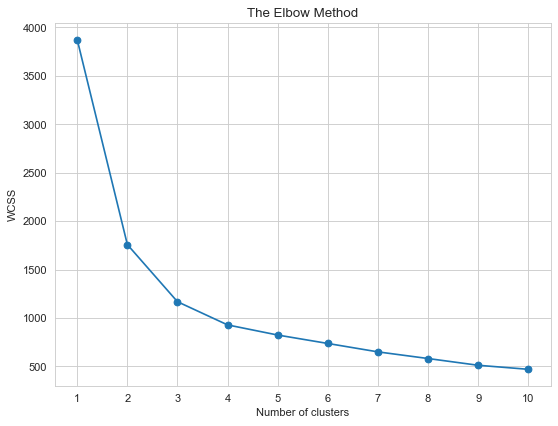

In [19]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()


### 3. Clustering (Using chosen K values)

In [4]:
# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df)
kmeans_3.labels_

NameError: name 'scaled_df' is not defined

In [21]:
# Assign clustering result to each country in the data frame
df_cluster['cluster_id'] = kmeans_3.labels_
df_cluster.head()

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster_id
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,0
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0


In [22]:
df_cluster['Banned or not'] = df.iloc[:,-1]
df_cluster['County Name'] = df.iloc[:,0]
df_cluster.head()

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster_id,Banned or not,County Name
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,24539,5205.44,385,4572,167427,47.1,583.87,0,0.0,"Adams County, Ohio"
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,28671,15555.51,2286,45012,1983272,253.9,402.55,0,1.0,"Allen County, Ohio"
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,28992,5702.44,1034,18234,701075,124.0,422.99,0,0.0,"Ashland County, Ohio"
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,26777,15281.91,1806,24464,913850,139.0,702.07,0,0.0,"Ashtabula County, Ohio"
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,24990,12969.70,1029,13265,469095,124.0,503.64,0,0.0,"Athens County, Ohio"


In [23]:
groupeddf = df_cluster.groupby('cluster_id')['Banned or not'].value_counts(ascending=True)
groupeddf

cluster_id  Banned or not
0           1.0               7
            0.0              61
1           0.0               3
2           1.0               3
            0.0              14
Name: Banned or not, dtype: int64

In [24]:
cluster_id0=df_cluster.loc[df_cluster['cluster_id'] == 0]
cluster_id0

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster_id,Banned or not,County Name
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,24539,5205.44,385,4572,167427,47.1,583.87,0,0.0,"Adams County, Ohio"
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,28671,15555.51,2286,45012,1983272,253.9,402.55,0,1.0,"Allen County, Ohio"
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,28992,5702.44,1034,18234,701075,124.0,422.99,0,0.0,"Ashland County, Ohio"
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,26777,15281.91,1806,24464,913850,139.0,702.07,0,0.0,"Ashtabula County, Ohio"
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,24990,12969.70,1029,13265,469095,124.0,503.64,0,0.0,"Athens County, Ohio"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,36716,2092.81,8114.24,7343.20,18321.28,35394.22,477.31,146.86,220.30,0.00,...,28831,3304.44,780,15739,623325,88.2,420.66,0,0.0,"Williams County, Ohio"
82,54906,3019.83,11914.60,10377.23,27288.28,51446.92,1482.46,164.72,439.25,54.91,...,28992,6588.72,1025,16462,607851,99.9,551.03,0,1.0,"Seneca County, Ohio"
83,132472,6623.60,26891.82,21327.99,66765.89,122801.54,3841.69,397.42,2649.44,0.00,...,36047,14439.45,2701,57707,2719738,214.3,617.16,0,0.0,"Wood County, Ohio"
85,21708,1128.82,4840.88,4428.43,10897.42,21121.88,108.54,65.12,151.96,0.00,...,30596,1714.93,494,9495,425207,53.8,406.88,0,0.0,"Wyandot County, Ohio"


## 4. Plotting clusters with chosen k value

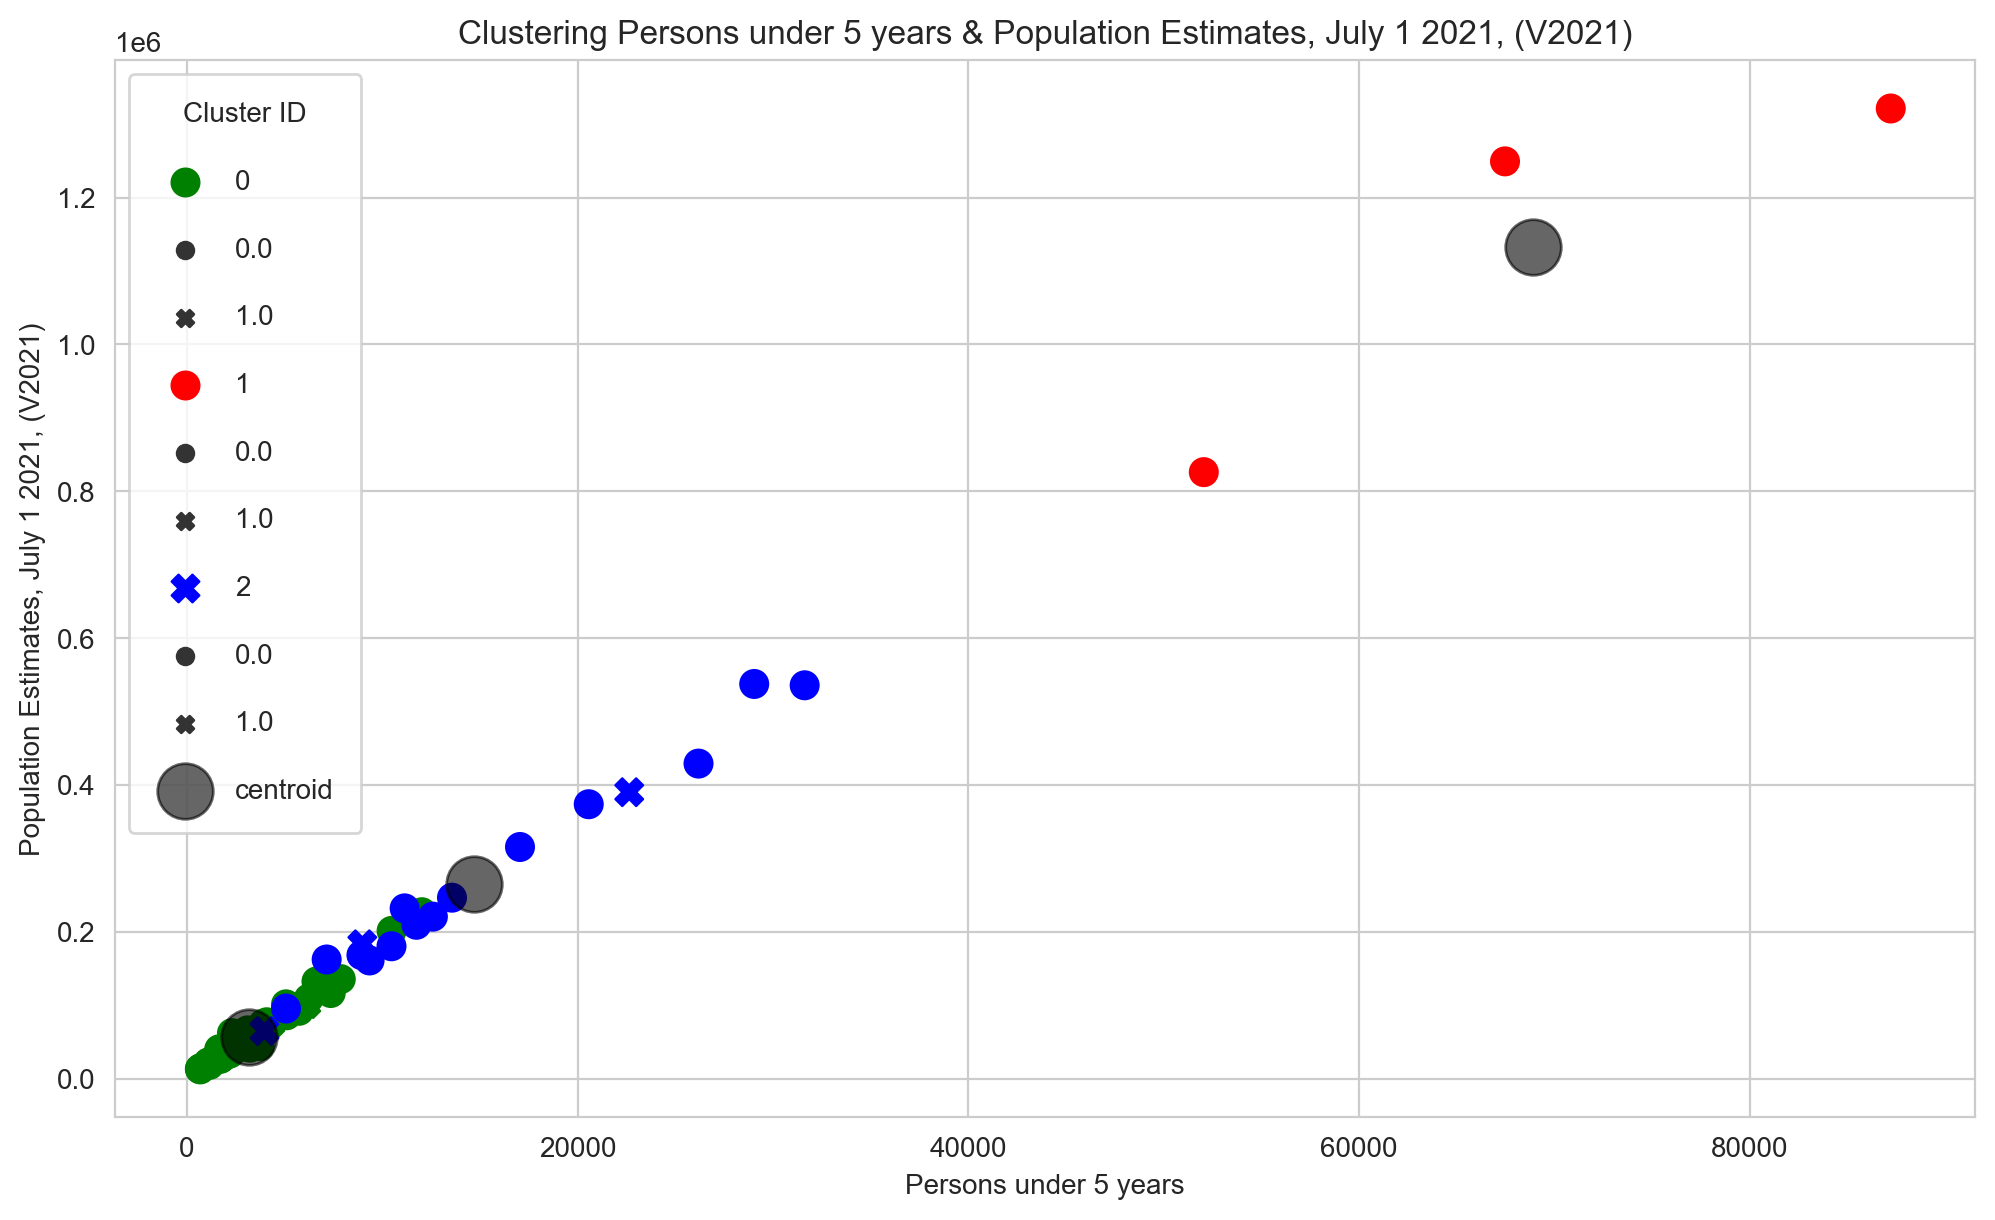

In [27]:
# Change default style
sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[1]],
                df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[0]],
                color = 'green', s=100, edgecolor = 'green', label= '0', style=df_cluster['Banned or not'])

sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[1]], 
                df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[0]], 
                color = 'red', s=100, edgecolor = 'red', label = '1', style=df_cluster['Banned or not'])

sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[1]],
                df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[0]],
                color = 'blue', s=100, edgecolor = 'blue', label = '2', style=df_cluster['Banned or not'])

ax.scatter(centroids_ori_scale[:, 1], centroids_ori_scale[:,0], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel(df_cluster.columns[1])
plt.ylabel(df_cluster.columns[0])
plt.title(f"Clustering {df_cluster.columns[1]} & {df_cluster.columns[0]}")
# plt.savefig('cluster_result.png')
plt.show()

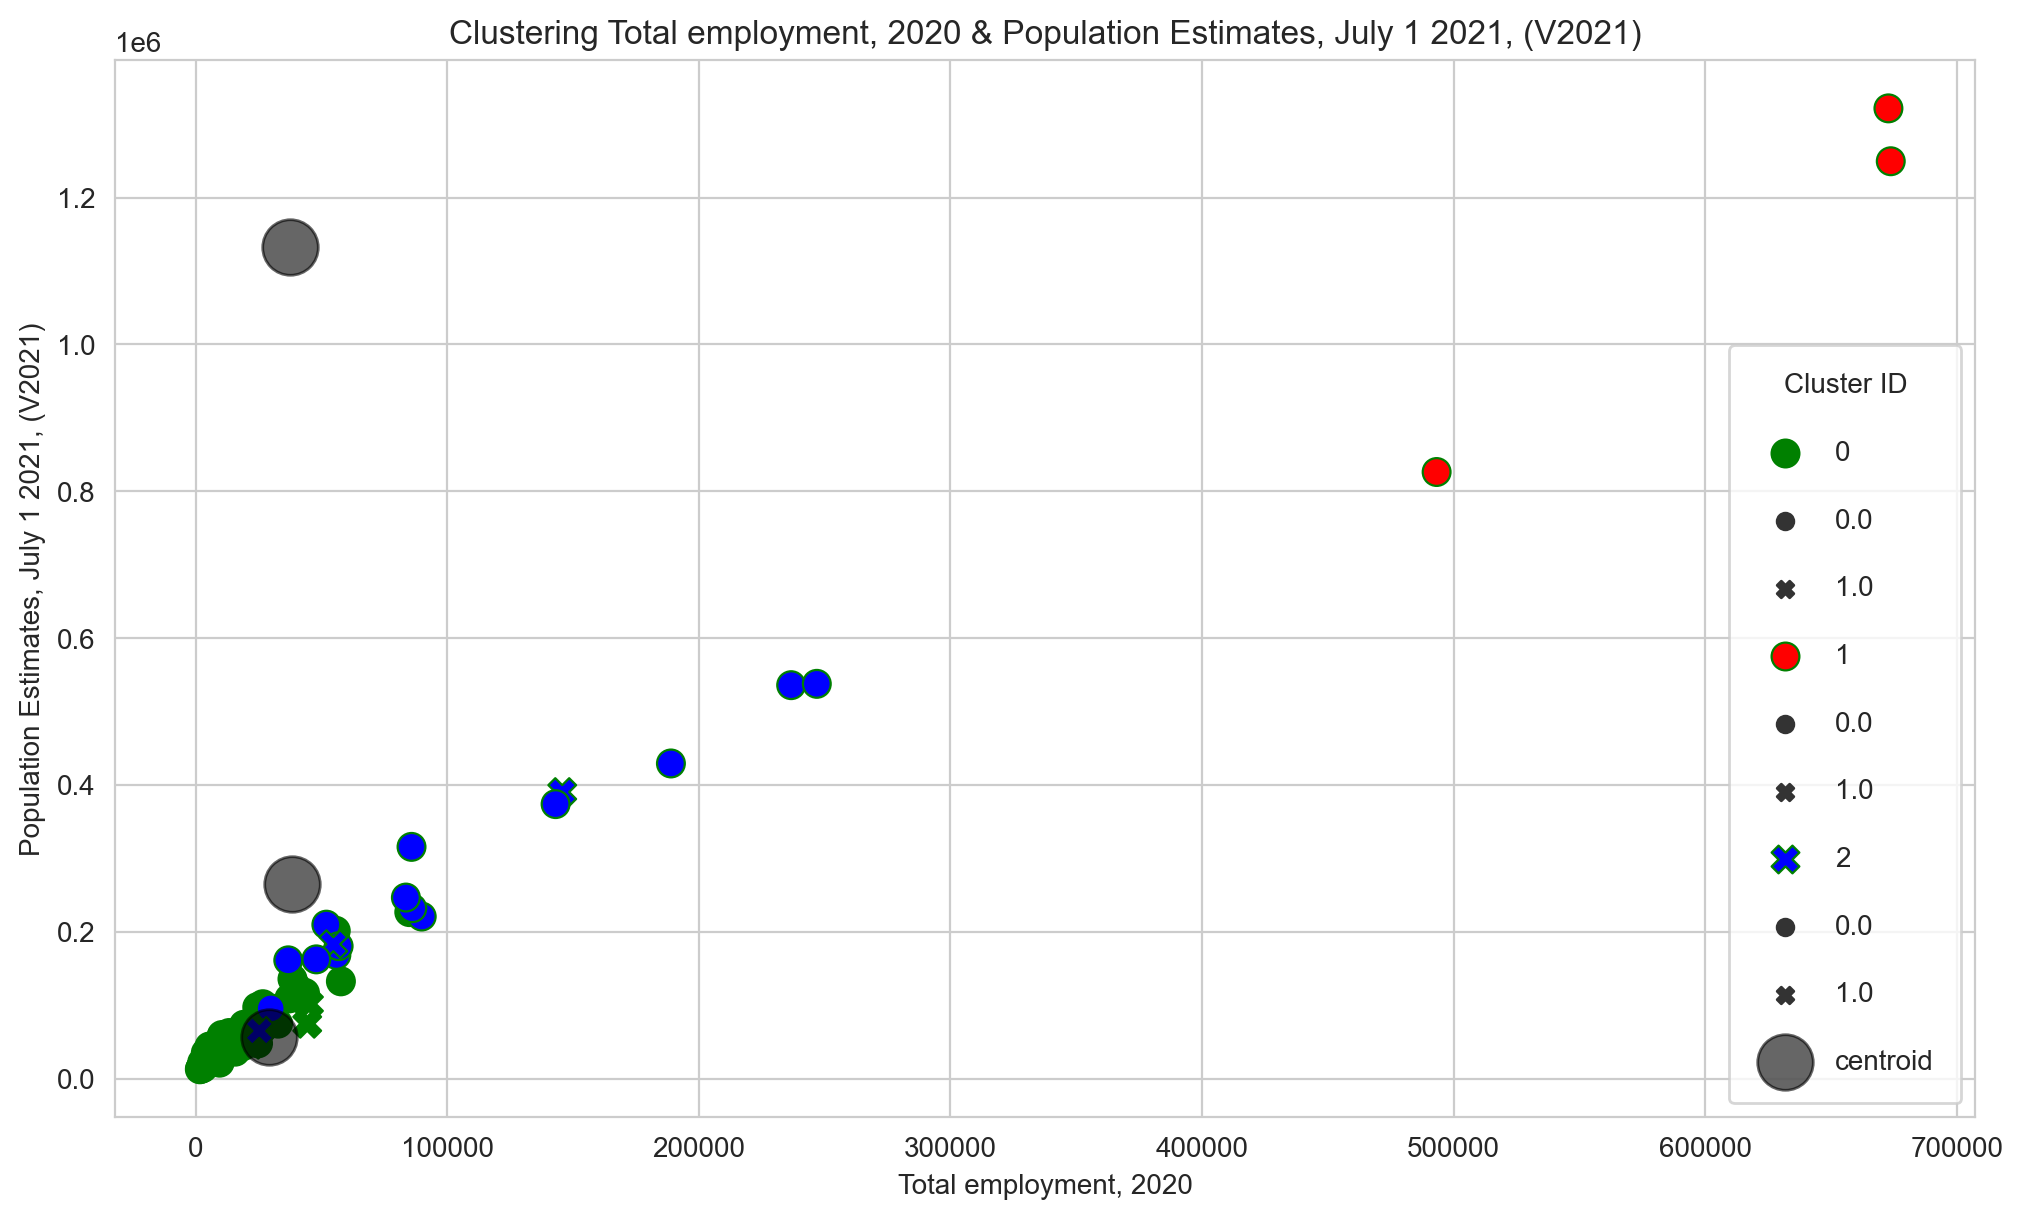

In [35]:
# Change default style
sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[-7]],
                df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[0]],
                color = 'green', s=100, edgecolor = 'green', label= '0',
                style=df_cluster['Banned or not'])

sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[-7]], df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[0]], color = 'red', s=100, edgecolor = 'green', label = '1', style=df_cluster['Banned or not'])
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[-7]], df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[0]], color = 'blue', s=100, edgecolor = 'green', label = '2', style=df_cluster['Banned or not'])
ax.scatter(centroids_ori_scale[:, -7], centroids_ori_scale[:,0], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel(df_cluster.columns[-7])
plt.ylabel(df_cluster.columns[0])
plt.title(f"Clustering {df_cluster.columns[-7]} & {df_cluster.columns[0]}")
# plt.savefig('cluster_result.png')
plt.show()

In [ ]:
# Change default style
sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[-7]],
                df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[0]],
                color = 'green', s=100, edgecolor = 'green', label= '0',
                style=df_cluster['Banned or not'])

sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[-7]], 
                df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[0]], 
                color = 'red', s=100, edgecolor = 'green', label = '1',
                style=df_cluster['Banned or not'])

sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[-7]], 
                df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[0]], 
                color = 'blue', s=100, edgecolor = 'blue', label = '2',
                style=df_cluster['Banned or not'])

# ax.scatter(centroids_ori_scale[:, -7], centroids_ori_scale[:,0], c='black', s=400, marker='*', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel(df_cluster.columns[-7])
plt.ylabel(df_cluster.columns[0])
plt.title(f"Clustering {df_cluster.columns[-7]} & {df_cluster.columns[0]}")
# plt.savefig('cluster_result2.png')
plt.show()

### 4a. Convex hull of banned points


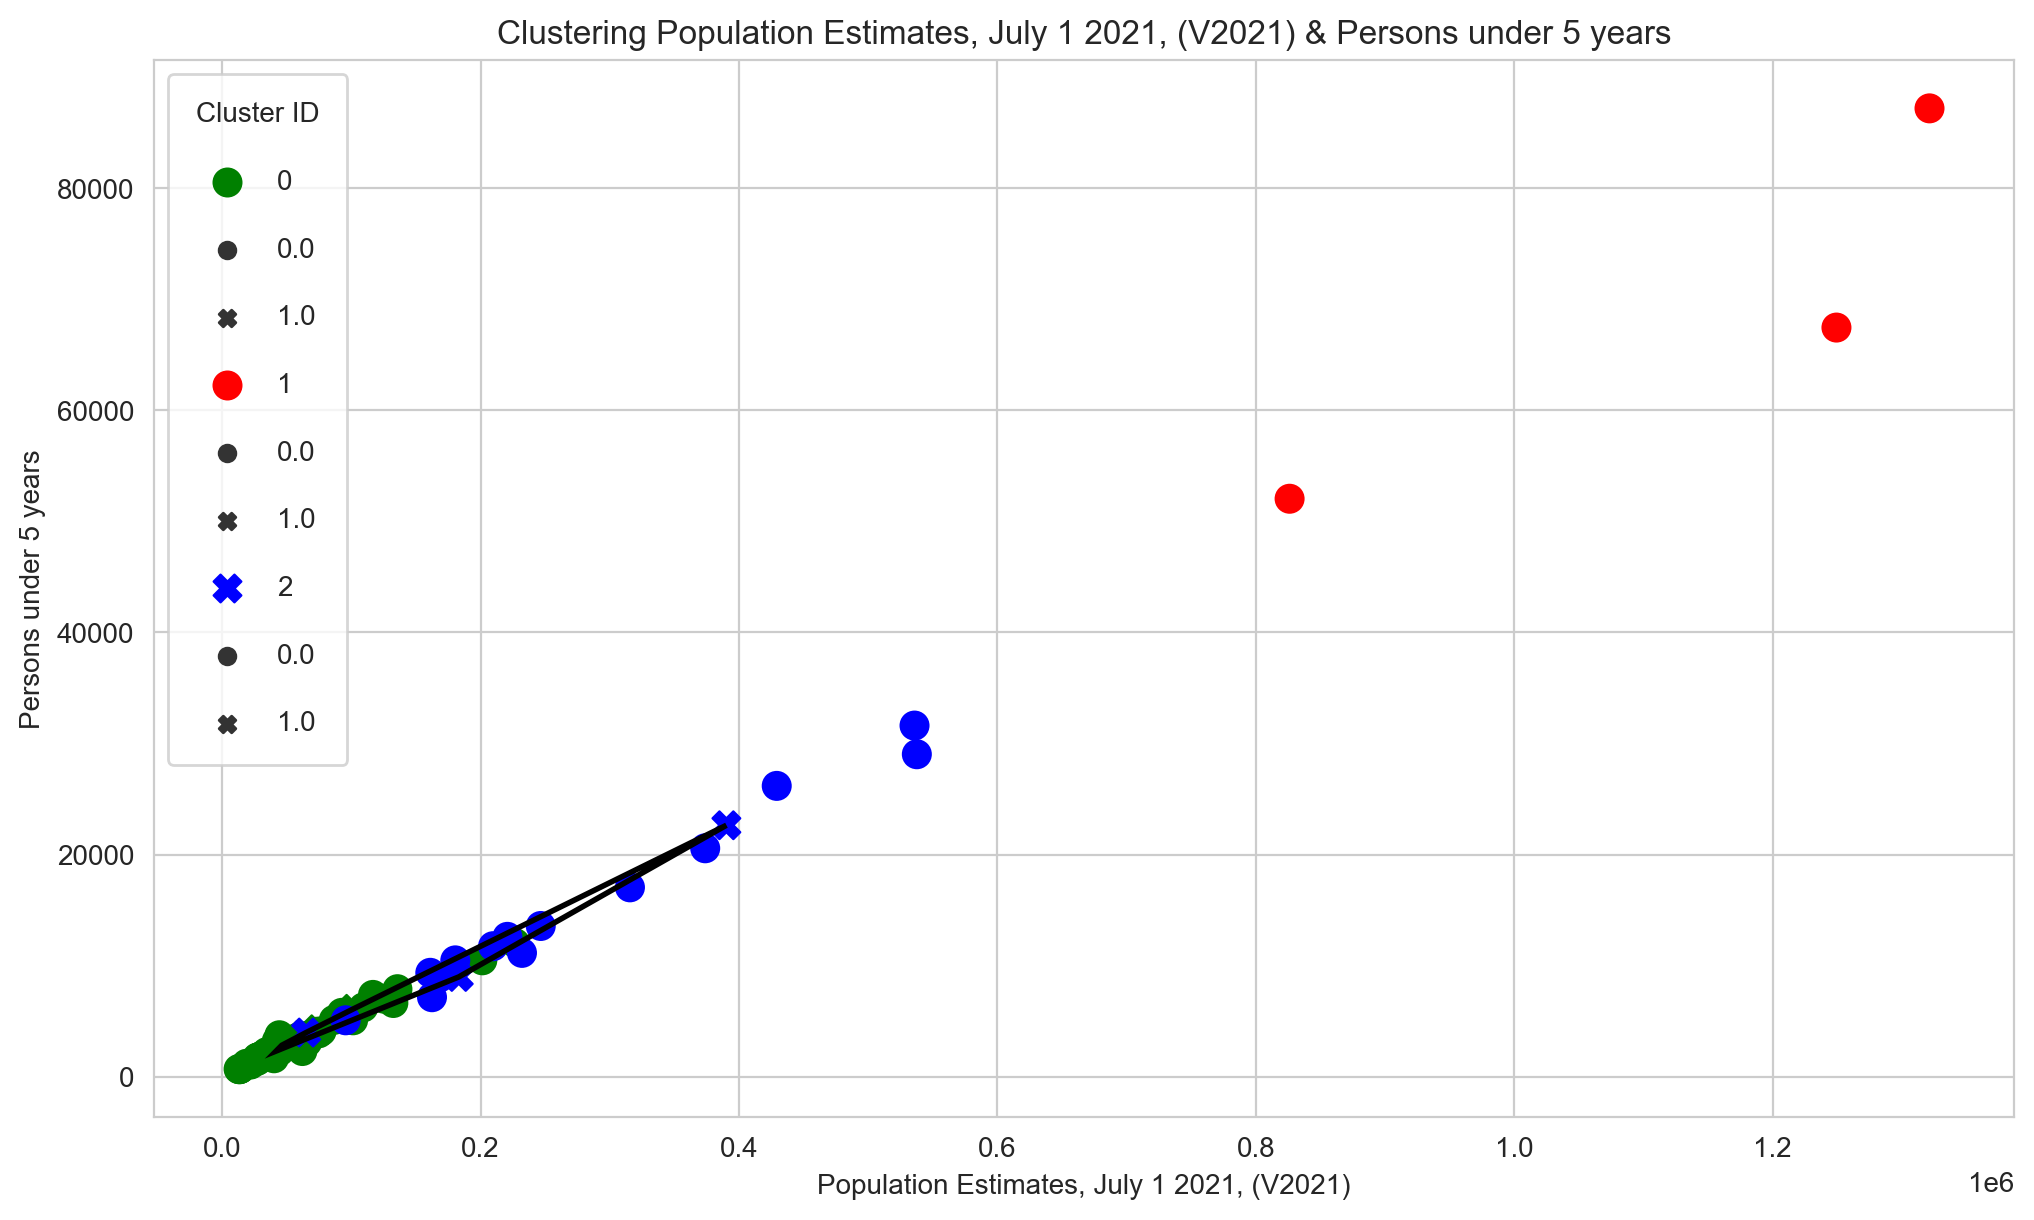

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Filter banned points
banned_points = df_cluster[df_cluster['Banned or not'] == 1][[df_cluster.columns[0], df_cluster.columns[1]]].values

# Compute convex hull
hull = ConvexHull(banned_points)

# Plot clustering result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[0]],
                df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[1]],
                color='green', s=100, edgecolor='green', label='0',
                style=df_cluster['Banned or not'])

sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[0]],
                df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[1]],
                color='red', s=100, edgecolor='red', label='1', style=df_cluster['Banned or not'])

sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[0]],
                df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[1]],
                color='blue', s=100, edgecolor='blue', label='2', style=df_cluster['Banned or not'])

plt.legend(title="Cluster ID", labelspacing=1.5, borderpad=1)

# Plot convex hull as polygon
polygon = plt.Polygon(banned_points[hull.vertices], edgecolor='black', facecolor='none', linewidth=2)
ax.add_patch(polygon)

plt.xlabel(df_cluster.columns[0])
plt.ylabel(df_cluster.columns[1])
plt.title(f"Clustering {df_cluster.columns[0]} & {df_cluster.columns[1]}")
plt.show()


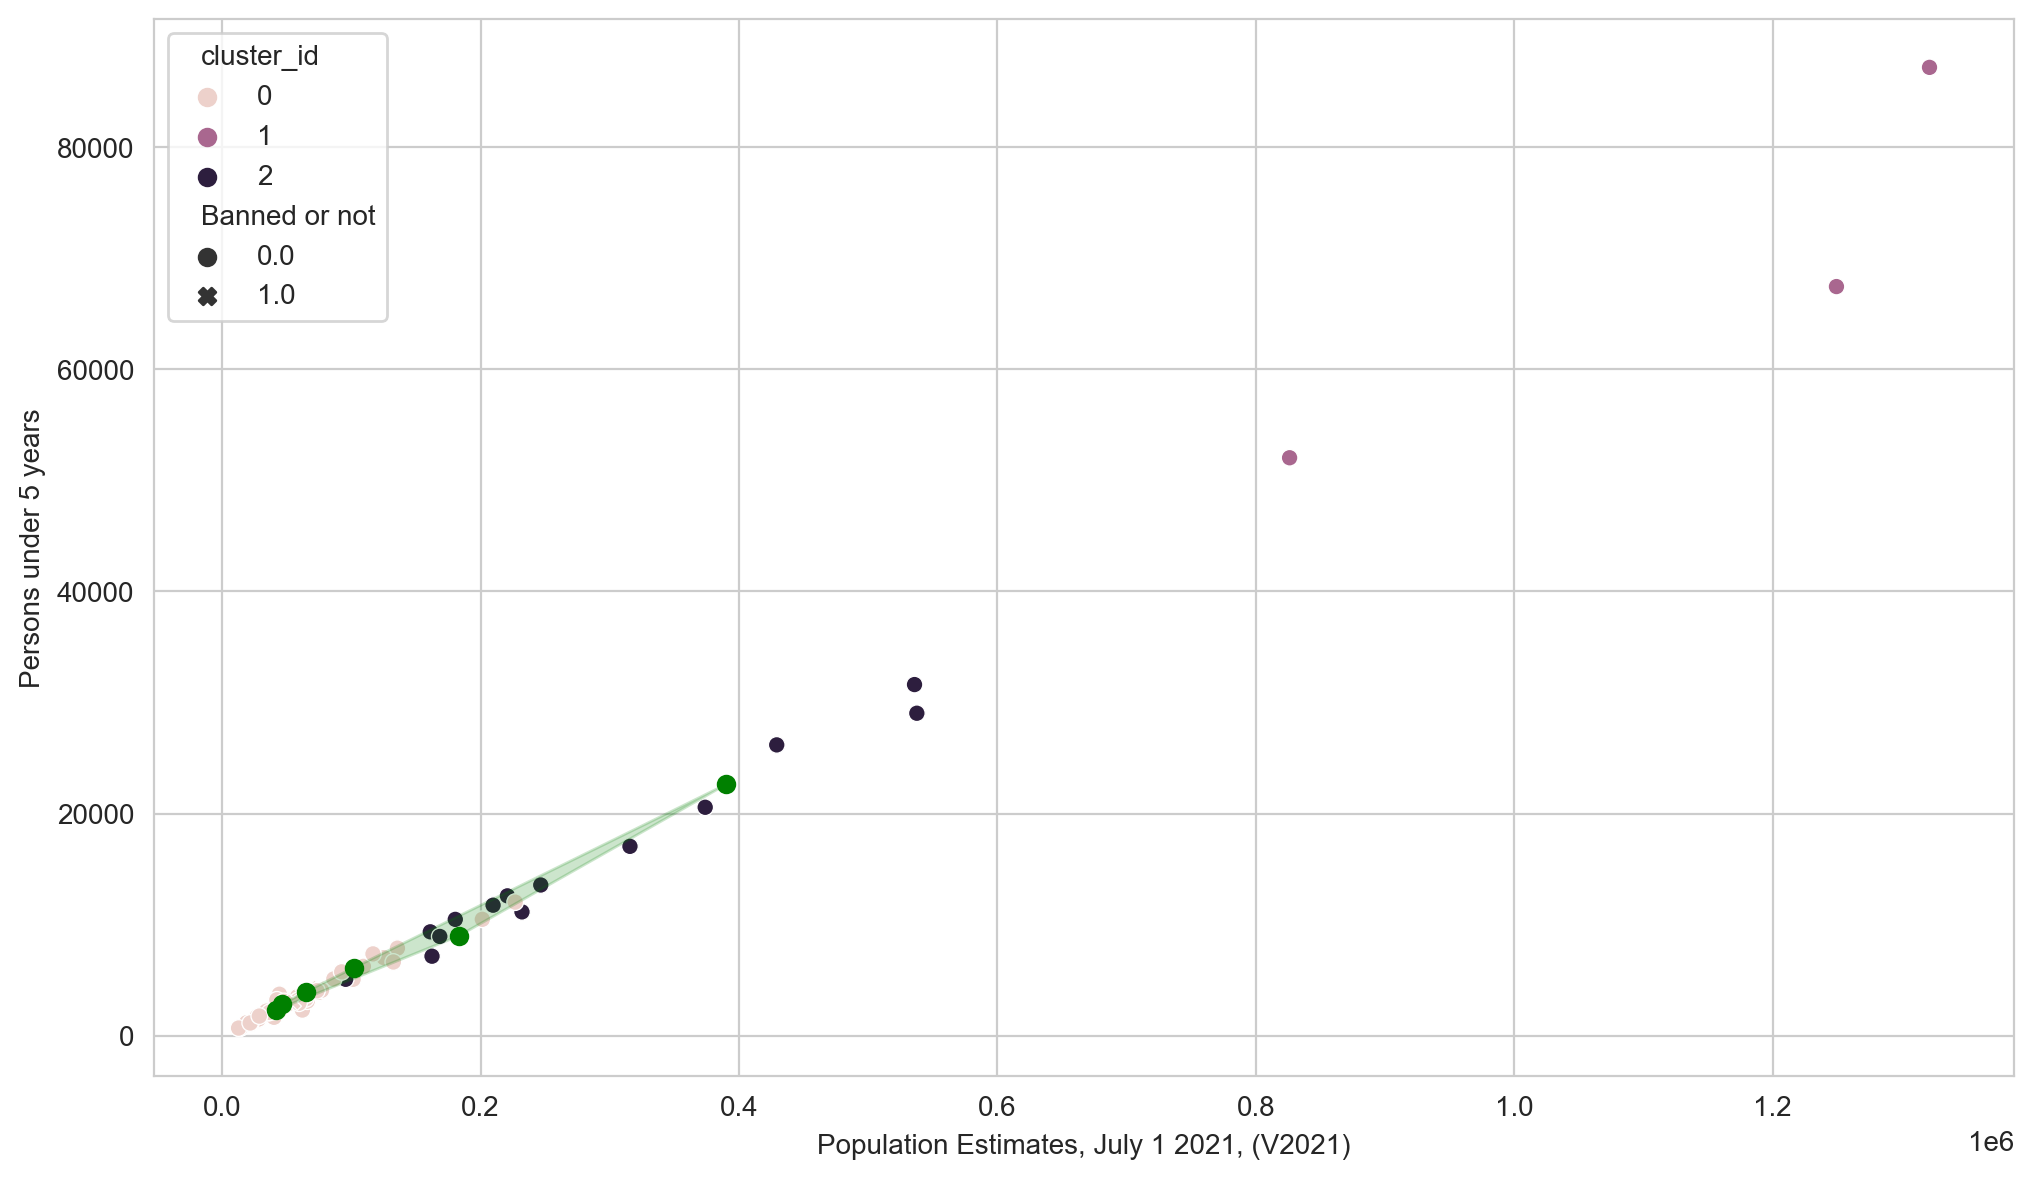

In [30]:

import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# Extract banned points
banned_points = df_cluster.loc[df_cluster['Banned or not'] == 1, [df_cluster.columns[0], df_cluster.columns[1]]].values

# Compute convex hull
hull = ConvexHull(banned_points)

# Extract points on convex hull
hull_points = banned_points[hull.vertices, :]

# Plot convex hull and points within it
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_cluster.columns[0], df_cluster.columns[1], data=df_cluster, hue='cluster_id', style='Banned or not', ax=ax)

ax.scatter(hull_points[:, 0], hull_points[:, 1], color='green')
ax.fill(hull_points[:, 0], hull_points[:, 1], color='green', alpha=0.2)
plt.show()


In [37]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# Extract banned points
banned_points = df_cluster.loc[df_cluster['Banned or not'] == 1, [df_cluster.columns[0], df_cluster.columns[1]]].values

# Compute convex hull of banned points
hull = ConvexHull(banned_points)

# Find non-banned points inside convex hull for each cluster
cluster_hulls = []
for cluster_id in df_cluster['cluster_id'].unique():
    cluster_points = df_cluster.loc[(df_cluster['Banned or not'] == 0) & (df_cluster['cluster_id'] == cluster_id), [df_cluster.columns[0], df_cluster.columns[1]]].values
    if len(cluster_points) > 0:
        cluster_hull = ConvexHull(cluster_points)
        cluster_inside = cluster_points[cluster_hull.contains_points(cluster_points), :]
        cluster_hulls.append(cluster_inside)

# Find cluster with most non-banned points inside convex hull
most_points = 0
most_points_hull = None
for cluster_hull in cluster_hulls:
    if len(cluster_hull) > most_points:
        most_points = len(cluster_hull)
        most_points_hull = cluster_hull

# Plot convex hull and points within it
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_cluster.columns[0], df_cluster.columns[1], data=df_cluster, hue='cluster_id', style='Banned or not', ax=ax)

ax.scatter(banned_points[:, 0], banned_points[:, 1], color='green')
ax.fill(banned_points[hull.vertices, 0], banned_points[hull.vertices, 1], color='green', alpha=0.2)
if most_points_hull is not None:
    ax.scatter(most_points_hull[:, 0], most_points_hull[:, 1], color='red')
    ax.fill(most_points_hull[ConvexHull(most_points_hull).vertices, 0], most_points_hull[ConvexHull(most_points_hull).vertices, 1], color='red', alpha=0.2)
plt.show()


AttributeError: 'ConvexHull' object has no attribute 'contains_points'

# Extra 

In [43]:
# data frame of cluster 0 and cluster 2 (clusters with most bans)
df_cluster_id12 = df_cluster.loc[(df_cluster['cluster_id'] == 0) | (df_cluster['cluster_id'] == 2)]
df_cluster_id12.head()

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster_id,Banned or not,County Name
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,24539,5205.44,385,4572,167427,47.1,583.87,0,0.0,"Adams County, Ohio"
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,28671,15555.51,2286,45012,1983272,253.9,402.55,0,1.0,"Allen County, Ohio"
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,28992,5702.44,1034,18234,701075,124.0,422.99,0,0.0,"Ashland County, Ohio"
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,26777,15281.91,1806,24464,913850,139.0,702.07,0,0.0,"Ashtabula County, Ohio"
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,24990,12969.70,1029,13265,469095,124.0,503.64,0,0.0,"Athens County, Ohio"


<AxesSubplot:xlabel='Total employment, 2020', ylabel='Population Estimates, July 1 2021, (V2021)'>

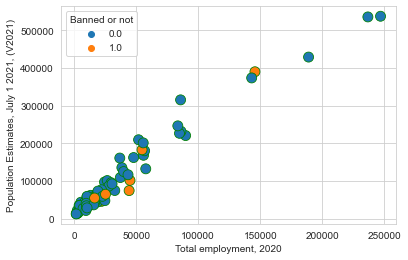

In [44]:
sns.scatterplot(df_cluster_id12.iloc[:,-7], df_cluster_id12.iloc[:,0], color = 'green', s=100, edgecolor = 'green', hue=df_cluster_id12.iloc[:,-2])


# K-means Clustering #2

In [45]:
# Create new data frame for Clustering
df_clusterTest = df[['Persons 65 years and over', 'Housing units, July 1, 2021, (V2021)',
       'Per capita income in past 12 months (in 2021 dollars), 2017-2021']] # No binary Var
df_clusterTest.head()

,Persons 65 years and over,"Housing units, July 1, 2021, (V2021)","Per capita income in past 12 months (in 2021 dollars), 2017-2021"
0,5095.27,12703,24539
1,18503.94,44707,28671
2,10201.62,22513,28992
3,19467.40,46355,26777
4,8874.01,26387,24990


## 1. Scaling 

In [46]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_clusterTest)
scaled = sc.fit_transform(data_scale.astype(float))
scaled_dfTest = pd.DataFrame(scaled, columns=df_clusterTest.columns)
scaled_dfTest.head()

,Persons 65 years and over,"Housing units, July 1, 2021, (V2021)","Per capita income in past 12 months (in 2021 dollars), 2017-2021"
0,-0.519097,-0.461465,-1.256369
1,-0.148065,-0.148431,-0.476045
2,-0.377799,-0.365513,-0.415425
3,-0.121405,-0.132311,-0.833725
4,-0.414535,-0.327621,-1.171199


## 2. Number of Clusters

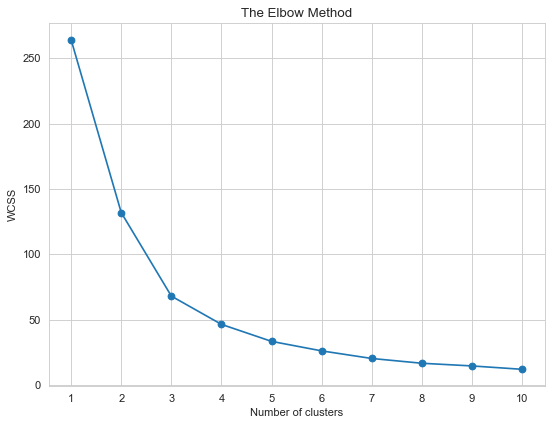

In [47]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_dfTest)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:

# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_dfTest)
kmeans_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int32)

In [49]:
# Assign clustering result to each country in the data frame
df_clusterTest['cluster_id'] = kmeans_3.labels_
df_clusterTest

,Persons 65 years and over,"Housing units, July 1, 2021, (V2021)","Per capita income in past 12 months (in 2021 dollars), 2017-2021",cluster_id
0,5095.27,12703,24539,1
1,18503.94,44707,28671,1
2,10201.62,22513,28992,1
3,19467.40,46355,26777,1
4,8874.01,26387,24990,1
...,...,...,...,...
83,21327.99,57308,36047,0
84,8446.23,24130,44442,0
85,4428.43,9847,30596,1
86,101612.64,246735,37373,0


In [50]:
df_clusterTest['Banned or not'] = df.iloc[:,-1]
df_clusterTest['County Name'] = df.iloc[:,0]
df_clusterTest

,Persons 65 years and over,"Housing units, July 1, 2021, (V2021)","Per capita income in past 12 months (in 2021 dollars), 2017-2021",cluster_id,Banned or not,County Name
0,5095.27,12703,24539,1,0.0,"Adams County, Ohio"
1,18503.94,44707,28671,1,1.0,"Allen County, Ohio"
2,10201.62,22513,28992,1,0.0,"Ashland County, Ohio"
3,19467.40,46355,26777,1,0.0,"Ashtabula County, Ohio"
4,8874.01,26387,24990,1,0.0,"Athens County, Ohio"
...,...,...,...,...,...,...
83,21327.99,57308,36047,0,0.0,"Wood County, Ohio"
84,8446.23,24130,44442,0,1.0,"Union County, Ohio"
85,4428.43,9847,30596,1,0.0,"Wyandot County, Ohio"
86,101612.64,246735,37373,0,0.0,"Summit County, Ohio"


In [52]:
groupeddfTest = df_clusterTest.groupby('cluster_id')['Banned or not'].value_counts(ascending=True)
groupeddfTest

cluster_id  Banned or not
0           1.0               3
            0.0              17
1           1.0               7
            0.0              58
2           0.0               3
Name: Banned or not, dtype: int64

## 4. Plotting clusters

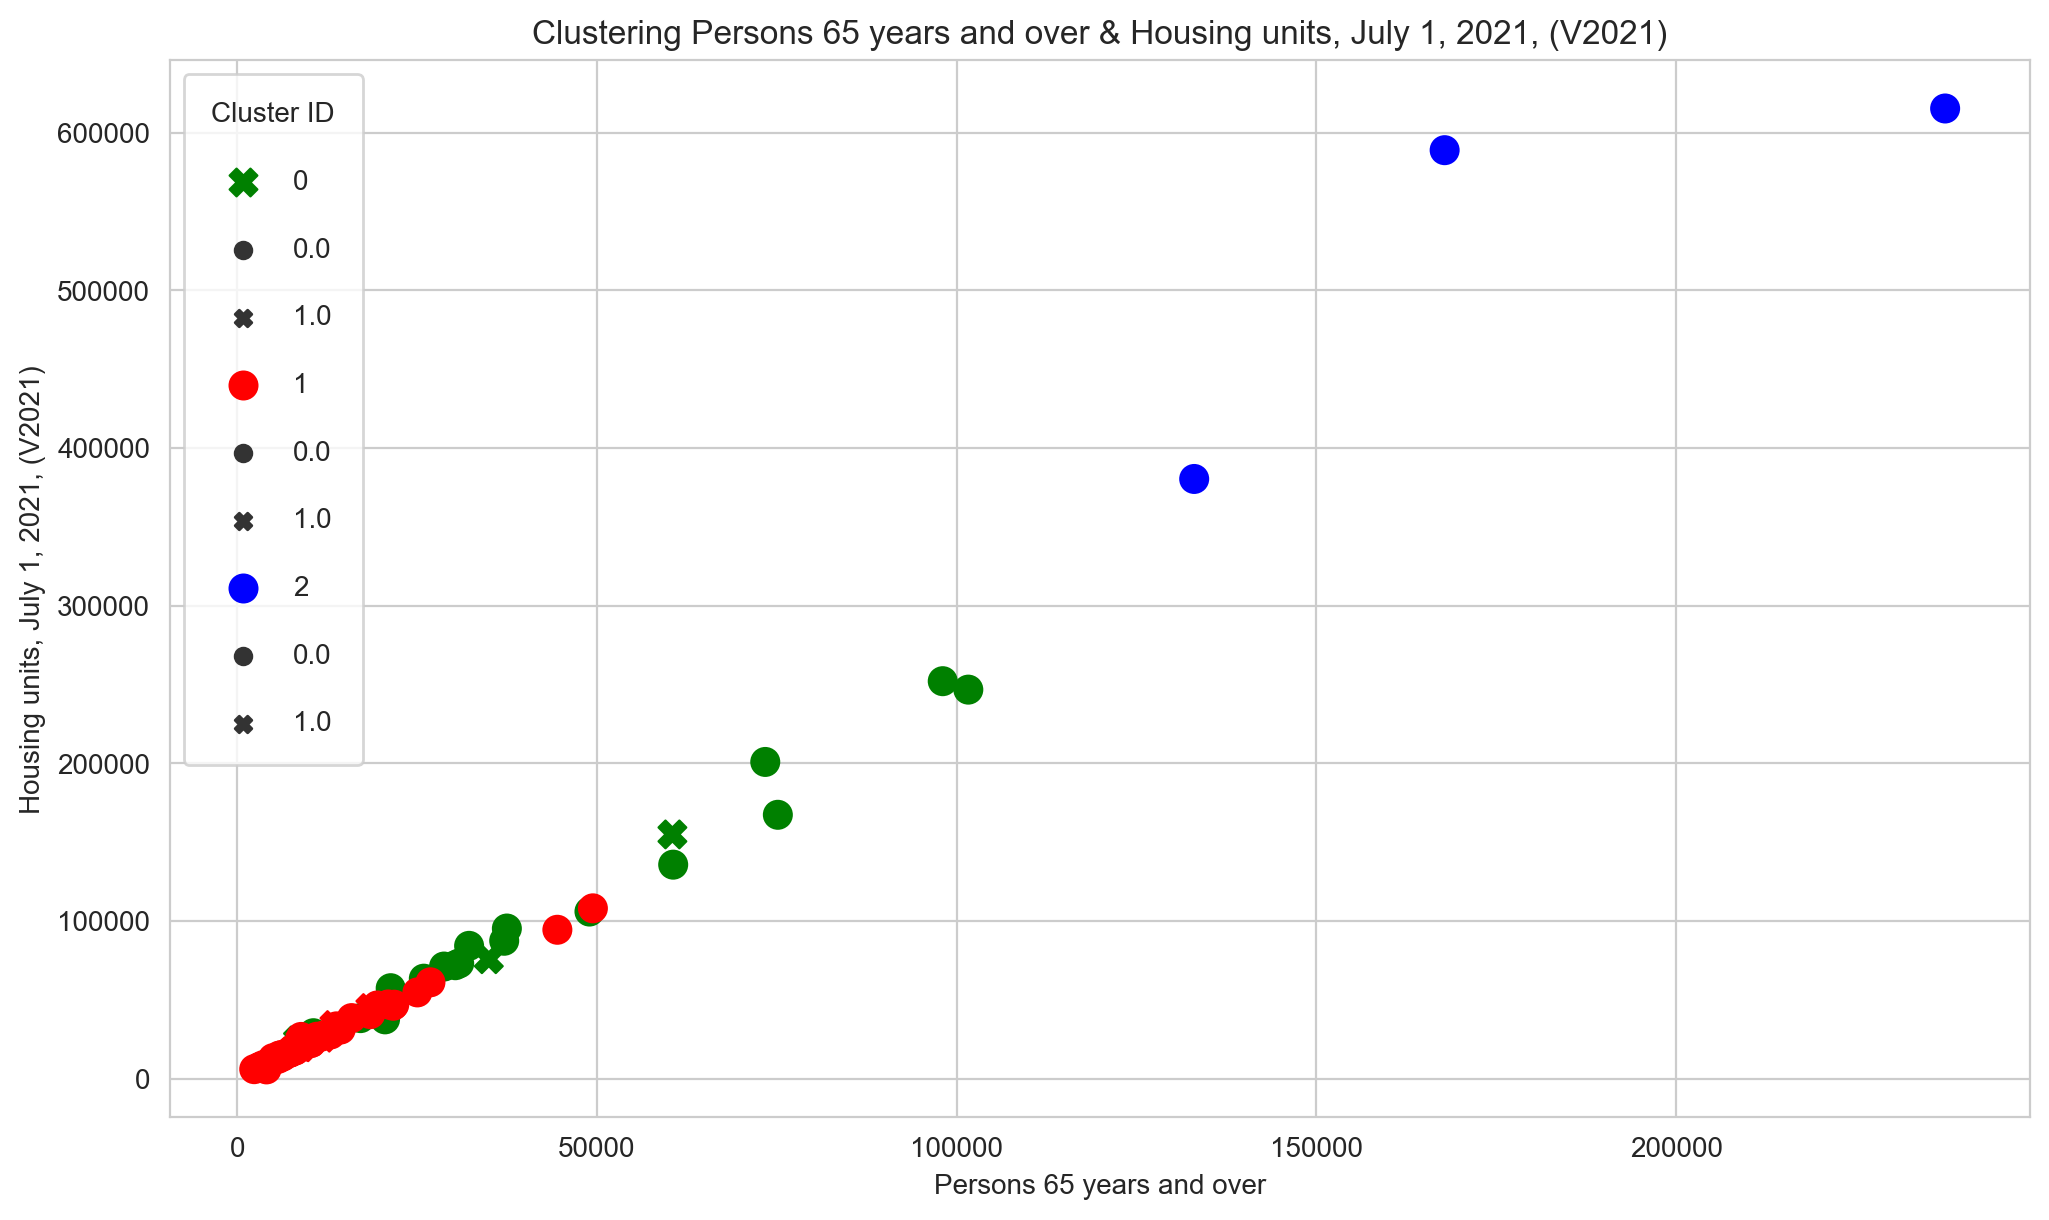

In [54]:
# Change default style
sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 0, df_clusterTest.columns[0]],
                df_clusterTest.loc[df_clusterTest['cluster_id'] == 0, df_clusterTest.columns[1]],
                color = 'green', s=100, edgecolor = 'green', label= '0',
                style=df_clusterTest['Banned or not'])

sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 1, df_clusterTest.columns[0]],
                df_clusterTest.loc[df_clusterTest['cluster_id'] == 1, df_clusterTest.columns[1]],
                color = 'red', s=100, edgecolor = 'red', label= '1',
                style=df_clusterTest['Banned or not'])

sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 2, df_clusterTest.columns[0]],
                df_clusterTest.loc[df_clusterTest['cluster_id'] == 2, df_clusterTest.columns[1]],
                color = 'blue', s=100, edgecolor = 'blue', label= '2',
                style=df_clusterTest['Banned or not'])

#ax.scatter(centroids_ori_scale[:, -7], centroids_ori_scale[:,0], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel(df_clusterTest.columns[0])
plt.ylabel(df_clusterTest.columns[1])
plt.title(f"Clustering {df_clusterTest.columns[0]} & {df_clusterTest.columns[1]}")
# plt.savefig('cluster_result3.png')
plt.show()

In [55]:
# Plotting all cluster in data set
# Change default style
# sns.set_style('whitegrid')
# for i in range(len(df_clusterTest.iloc[:, :-3].columns)):
#     for j in range(len(df_clusterTest.iloc[:, :-3].columns)):
#         if df_clusterTest.iloc[:, :-3].columns[i] != df_clusterTest.iloc[:, :-3].columns[j]:
#             # Centroid Inverse Scaling
#             centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
#             # Plot Clustering Result
#             fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
#             sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 0, df_clusterTest.iloc[:, :-3].columns[i]],
#                             df_clusterTest.loc[df_clusterTest['cluster_id'] == 0, df_clusterTest.iloc[:, :-3].columns[j]],
#                             color = 'green', s=100, edgecolor = 'green', label= '0',
#                             style=df_cluster['Banned or not'])

#             sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 1, df_clusterTest.iloc[:, :-3].columns[i]],
#                             df_clusterTest.loc[df_clusterTest['cluster_id'] == 1, df_clusterTest.iloc[:, :-3].columns[j]],
#                             color = 'red', s=100, edgecolor = 'red', label= '1',
#                             style=df_cluster['Banned or not'])

#             sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 2, df_clusterTest.iloc[:, :-3].columns[i]],
#                             df_clusterTest.loc[df_clusterTest['cluster_id'] == 2, df_clusterTest.iloc[:, :-3].columns[j]],
#                             color = 'blue', s=100, edgecolor = 'blue', label= '2',
#                             style=df_cluster['Banned or not'])

#             #ax.scatter(centroids_ori_scale[:, -7], centroids_ori_scale[:,0], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
#             plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
#             plt.xlabel(df_clusterTest.columns[i])
#             plt.ylabel(df_clusterTest.columns[j])
#             plt.title(f"Clustering {df_clusterTest.columns[i]} & {df_clusterTest.columns[j]}")
#             # plt.savefig('cluster_result.png')
#             plt.show()

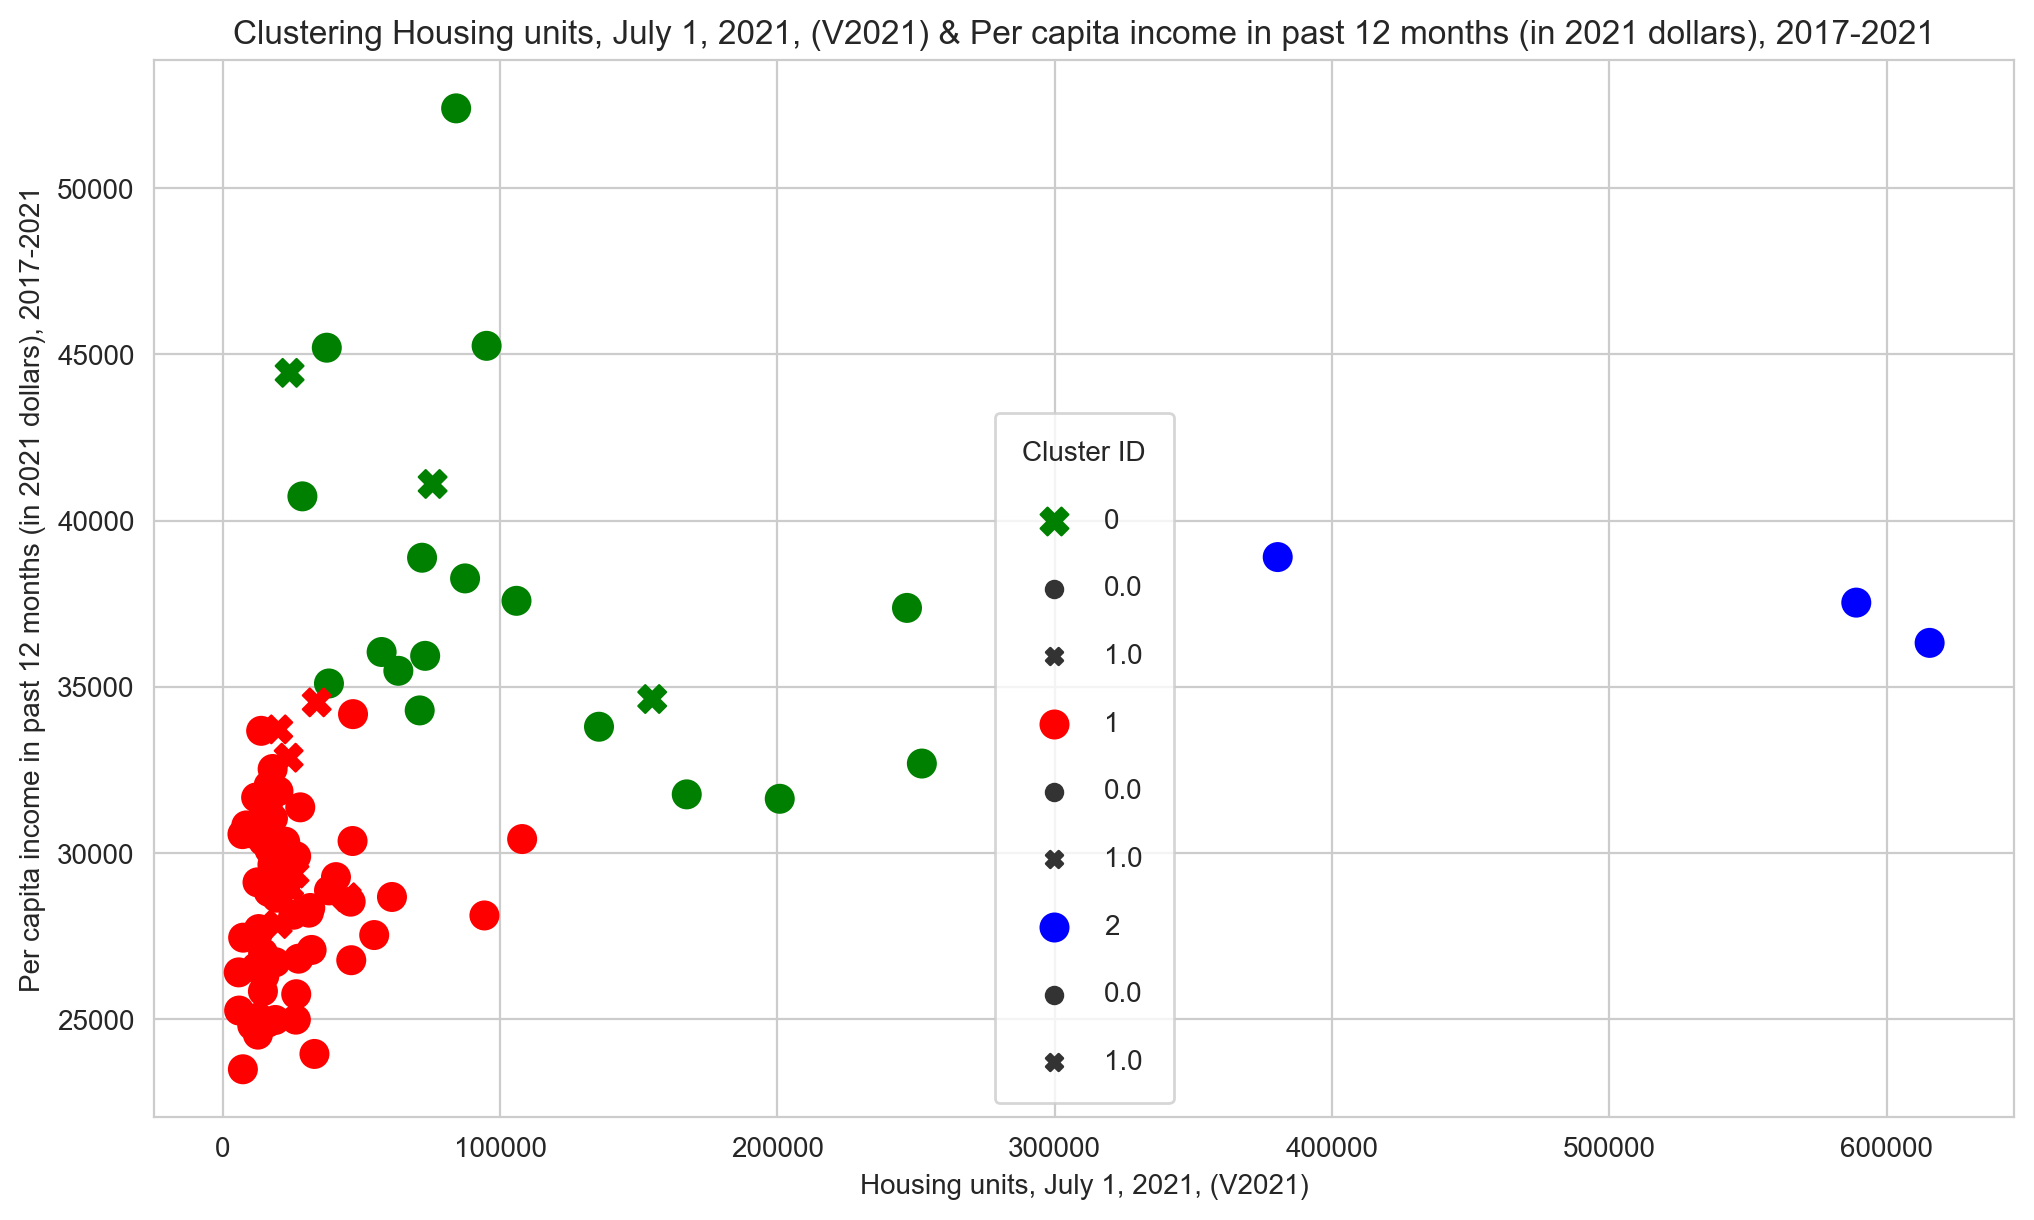

In [57]:
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 0, df_clusterTest.iloc[:, :-3].columns[1]],
                df_clusterTest.loc[df_clusterTest['cluster_id'] == 0, df_clusterTest.iloc[:, :-3].columns[2]],
                color = 'green', s=100, edgecolor = 'green', label= '0',
                style=df_cluster['Banned or not'])

sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 1, df_clusterTest.iloc[:, :-3].columns[1]],
                df_clusterTest.loc[df_clusterTest['cluster_id'] == 1, df_clusterTest.iloc[:, :-3].columns[2]],
                color = 'red', s=100, edgecolor = 'red', label= '1',
                style=df_cluster['Banned or not'])

sns.scatterplot(df_clusterTest.loc[df_clusterTest['cluster_id'] == 2, df_clusterTest.iloc[:, :-3].columns[1]],
                df_clusterTest.loc[df_clusterTest['cluster_id'] == 2, df_clusterTest.iloc[:, :-3].columns[2]],
                color = 'blue', s=100, edgecolor = 'blue', label= '2',
                style=df_cluster['Banned or not'])

#ax.scatter(centroids_ori_scale[:, -7], centroids_ori_scale[:,0], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel(df_clusterTest.columns[1])
plt.ylabel(df_clusterTest.columns[2])
plt.title(f"Clustering {df_clusterTest.columns[1]} & {df_clusterTest.columns[2]}")
# plt.savefig('cluster_result1.png')
plt.show()

# K-means Clustering #3

In [59]:
# new data frame for clustering #3
df_cluster2 = df[['Population Estimates, July 1 2021, (V2021)', 'Total retail sales per capita, 2017', 
                  'Median household income (in 2021 dollars), 2017-2021', 
                  'Per capita income in past 12 months (in 2021 dollars), 2017-2021', 'Persons in poverty']]

df_cluster2


,"Population Estimates, July 1 2021, (V2021)","Total retail sales per capita, 2017","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty
0,27542,9461,44467,24539,5205.44
1,101670,16266,55114,28671,15555.51
2,52316,9431,58168,28992,5702.44
3,97337,10406,49680,26777,15281.91
4,62056,11148,47061,24990,12969.70
...,...,...,...,...,...
83,132472,14333,66337,36047,14439.45
84,64971,13966,96634,44442,3573.40
85,21708,12356,61626,30596,1714.93
86,537633,15843,63111,37373,67204.12


## 1. Scaling 

In [60]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_cluster2)
scaled2 = sc.fit_transform(data_scale.astype(float))
scaled_df2 = pd.DataFrame(scaled2, columns=df_cluster2.columns)
scaled_df2.head()

,"Population Estimates, July 1 2021, (V2021)","Total retail sales per capita, 2017","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty
0,-0.483125,-0.611599,-1.299905,-1.256369,-0.377214
1,-0.146288,0.781452,-0.427729,-0.476045,-0.067375
2,-0.370552,-0.617740,-0.177553,-0.415425,-0.362336
3,-0.165977,-0.418148,-0.872869,-0.833725,-0.075566
4,-0.326294,-0.266253,-1.087411,-1.171199,-0.144784


## 2. Number of Clusters

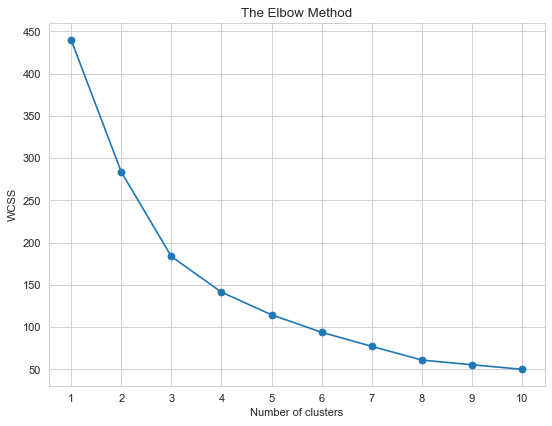

In [61]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df2)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

## 3. Clustering (Using chosen K values)

In [62]:
# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df2)
kmeans_3.labels_

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 3, 0,
       0, 0, 1, 0, 2, 3, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 0, 2],
      dtype=int32)

In [64]:
# Assign clustering result to each country in the data frame
df_cluster2['cluster_id'] = kmeans_3.labels_
df_cluster2

,"Population Estimates, July 1 2021, (V2021)","Total retail sales per capita, 2017","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,cluster_id,Banned or not,County Name
0,27542,9461,44467,24539,5205.44,2,0.0,"Adams County, Ohio"
1,101670,16266,55114,28671,15555.51,0,1.0,"Allen County, Ohio"
2,52316,9431,58168,28992,5702.44,2,0.0,"Ashland County, Ohio"
3,97337,10406,49680,26777,15281.91,2,0.0,"Ashtabula County, Ohio"
4,62056,11148,47061,24990,12969.70,2,0.0,"Athens County, Ohio"
...,...,...,...,...,...,...,...,...
83,132472,14333,66337,36047,14439.45,0,0.0,"Wood County, Ohio"
84,64971,13966,96634,44442,3573.40,3,1.0,"Union County, Ohio"
85,21708,12356,61626,30596,1714.93,2,0.0,"Wyandot County, Ohio"
86,537633,15843,63111,37373,67204.12,0,0.0,"Summit County, Ohio"


In [65]:
df_cluster2['Banned or not'] = df.iloc[:,-1]
df_cluster2['County Name'] = df.iloc[:,0]
df_cluster2

,"Population Estimates, July 1 2021, (V2021)","Total retail sales per capita, 2017","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,cluster_id,Banned or not,County Name
0,27542,9461,44467,24539,5205.44,2,0.0,"Adams County, Ohio"
1,101670,16266,55114,28671,15555.51,0,1.0,"Allen County, Ohio"
2,52316,9431,58168,28992,5702.44,2,0.0,"Ashland County, Ohio"
3,97337,10406,49680,26777,15281.91,2,0.0,"Ashtabula County, Ohio"
4,62056,11148,47061,24990,12969.70,2,0.0,"Athens County, Ohio"
...,...,...,...,...,...,...,...,...
83,132472,14333,66337,36047,14439.45,0,0.0,"Wood County, Ohio"
84,64971,13966,96634,44442,3573.40,3,1.0,"Union County, Ohio"
85,21708,12356,61626,30596,1714.93,2,0.0,"Wyandot County, Ohio"
86,537633,15843,63111,37373,67204.12,0,0.0,"Summit County, Ohio"


## 4. Plotting clusters with chosen k value

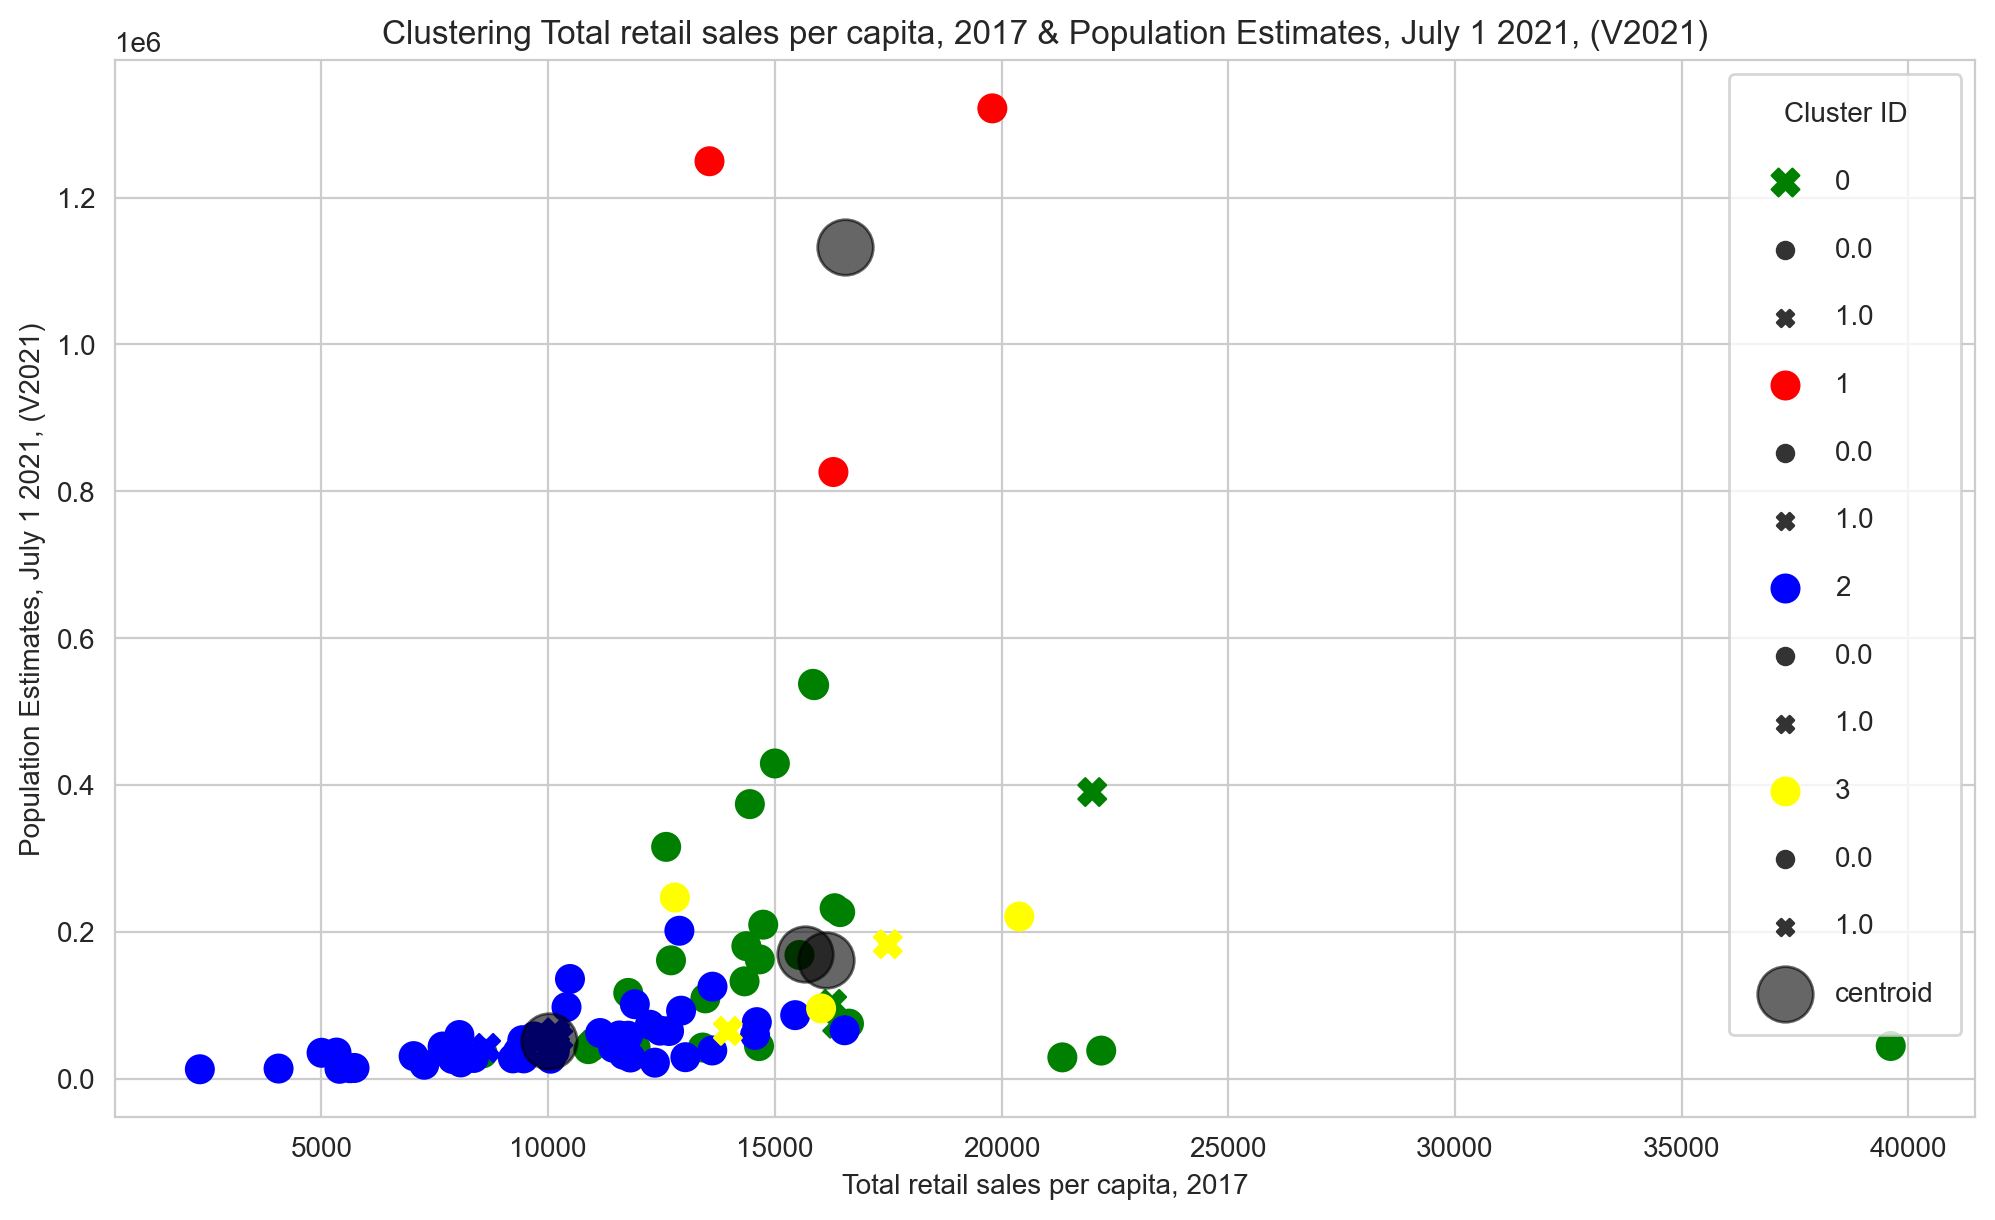

In [67]:
# Change default style
sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[1]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[0]],
                color = 'green', s=100, edgecolor = 'green', label= '0', style=df_cluster2['Banned or not'])

sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[1]], 
                df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[0]], 
                color = 'red', s=100, edgecolor = 'red', label = '1', style=df_cluster2['Banned or not'])

sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[1]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[0]],
                color = 'blue', s=100, edgecolor = 'blue', label = '2', style=df_cluster2['Banned or not'])

ax.scatter(centroids_ori_scale[:, 1], centroids_ori_scale[:,0], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel(df_cluster2.columns[1])
plt.ylabel(df_cluster2.columns[0])
plt.title(f"Clustering {df_cluster2.columns[1]} & {df_cluster2.columns[0]}")
# plt.savefig('cluster_result.png')
plt.show()